In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
KAGGLE_HOME_DIR = '/content/drive/MyDrive/LOL Win/archive.zip'

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Input

In [4]:
dataset = pd.read_csv(KAGGLE_HOME_DIR)

In [5]:
dataset

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [6]:
dataset.shape

(9879, 40)

In [7]:
dataset.drop("gameId", axis=1, inplace=True)

In [8]:
dataset = dataset.sample(frac = 1).reset_index(drop=True)

In [9]:
Y = dataset["blueWins"]

In [10]:
X = dataset.drop("blueWins", axis=1, inplace=False)

In [11]:
X.shape

(9879, 38)

In [12]:
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [13]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

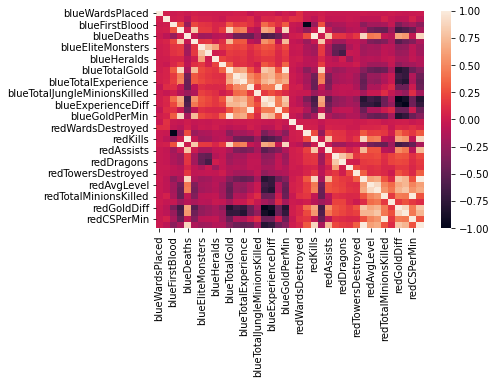

In [14]:
sns.heatmap(X.corr())

In [15]:
DATASET_SIZE = len(X)
train_size = int(np.floor(0.8 * DATASET_SIZE))
test_size = int(np.ceil(0.20 * DATASET_SIZE))
print(train_size)
print(test_size)

7903
1976


In [16]:
X_train = X.iloc[:train_size]
Y_train = Y.iloc[:train_size]

X_test = X.iloc[train_size:]
Y_test = Y.iloc[train_size:]

In [17]:
model = Sequential()
model.add(Input(shape=(38,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                624       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# BATCH_SIZE = 100
EPOCHS = 300

In [20]:
tf.test.is_built_with_cuda()

True

In [21]:
tf.test.gpu_device_name()

''

Epoch 1/300
198/198 [==============================] - 3s 8ms/step - loss: 518.1293 - accuracy: 0.5756 - val_loss: 4.8695 - val_accuracy: 0.5617
Epoch 2/300
198/198 [==============================] - 1s 7ms/step - loss: 1.1369 - accuracy: 0.6074 - val_loss: 1.0678 - val_accuracy: 0.6281
Epoch 3/300
198/198 [==============================] - 2s 8ms/step - loss: 0.7839 - accuracy: 0.6291 - val_loss: 0.8504 - val_accuracy: 0.6369
Epoch 4/300
198/198 [==============================] - 1s 4ms/step - loss: 0.7308 - accuracy: 0.6471 - val_loss: 0.7827 - val_accuracy: 0.6148
Epoch 5/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6880 - accuracy: 0.6482 - val_loss: 0.6725 - val_accuracy: 0.6357
Epoch 6/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6483 - accuracy: 0.6648 - val_loss: 0.6456 - val_accuracy: 0.6679
Epoch 7/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6288 - accuracy: 0.6762 - val_loss: 0.6304 - val_accuracy: 0.66

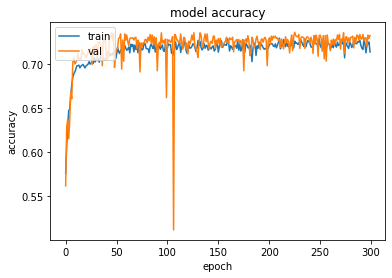

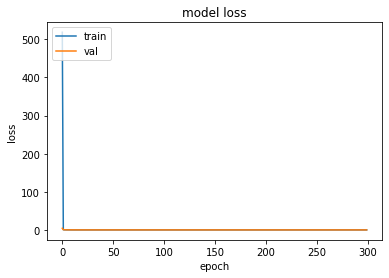

In [22]:
with tf.device('/device:GPU:0'): 
  history=model.fit(
      x=X_train,
      y=Y_train,
      epochs=EPOCHS,
      verbose=1,
      validation_split=0.2,
      shuffle=True
  )
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Plot history: loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [23]:
model.evaluate(X_test, Y_test)

62/62 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7257


[0.5384104251861572, 0.7257084846496582]